# Pymaceuticals Inc.
---

### Analysis

- A strong positive correlation exists between Weight and Average Tumor Volume for the Mice under Drug Treatment Capomulin. This indicates that the heavier the mouse, the larger the tumor volume.
- Number of Samples for each drug regimen was similar. Being Propriva, the drug regimen with fewer mice tested, while Capomulin and Ramicane were the treatments with more mice tested. The Bar charts can easily evidence this. Maybe these last two regimens are less expensive and Propriva the most expensive, for instance.
- The pie charts show that almost the same quantity of female and male mice was tested, which means the results displayed will not be sex-biased.

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
pymaceuticals.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [166]:
# Checking the number of mice.
number_mice = pymaceuticals["Mouse ID"].nunique()
number_mice

249

In [167]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = pymaceuticals.loc[pymaceuticals.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [168]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_miceID_df = pymaceuticals.loc[pymaceuticals["Mouse ID"]=="g989", :]
#duplicate_miceID_df

In [169]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = 'g989'
clean_df = pymaceuticals[pymaceuticals["Mouse ID"] != mouse_to_drop]
#clean_df.head()

In [170]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df["Mouse ID"].nunique()
number_mice_clean

248

## Summary Statistics

In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, "Tumor Volumen Std. Err": sem})
summary_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumen Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

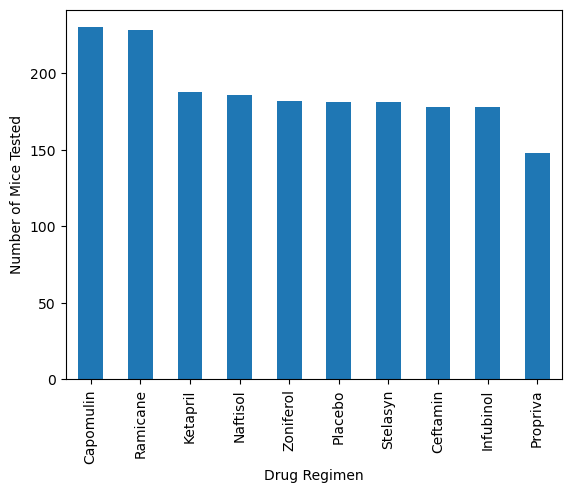

In [173]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = clean_df.groupby("Drug Regimen")
number_mice = drug_regimen["Mouse ID"].count().sort_values(ascending=False)

number_mice_chart = number_mice.plot(kind='bar')
number_mice_chart.set_xlabel("Drug Regimen")
number_mice_chart.set_ylabel("Number of Mice Tested")
plt.show()

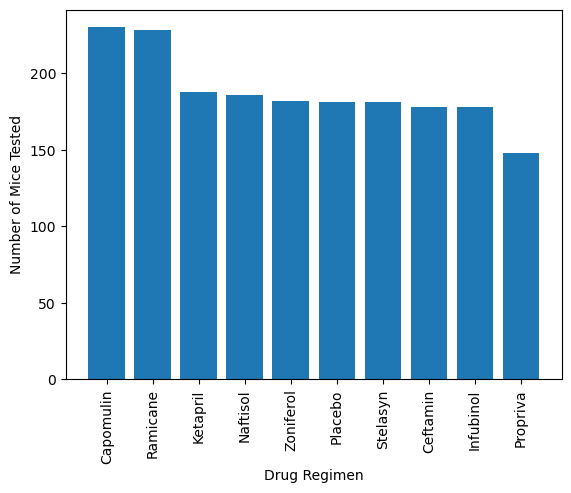

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = number_mice.index.values
y_axis = number_mice.values 

plt.bar(x_axis, y_axis, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()

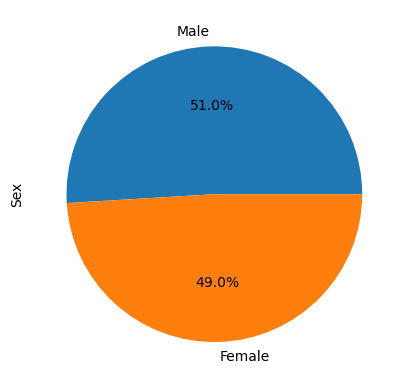

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby("Sex")["Sex"].count().sort_values(ascending=False)
sex.plot(kind='pie', autopct='%1.1f%%')
plt.show()

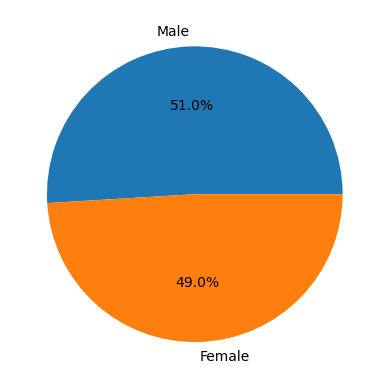

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Using Dataframe "sex" defined above
data = sex
labels = ['Male', 'Female']

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
#Reset Index
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, clean_df, on=("Mouse ID", "Timepoint"), how='left')
#merged_data.head()

In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset 
    tumor_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
                   
    print(f"{drug}'s potential outliers {outliers}")

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


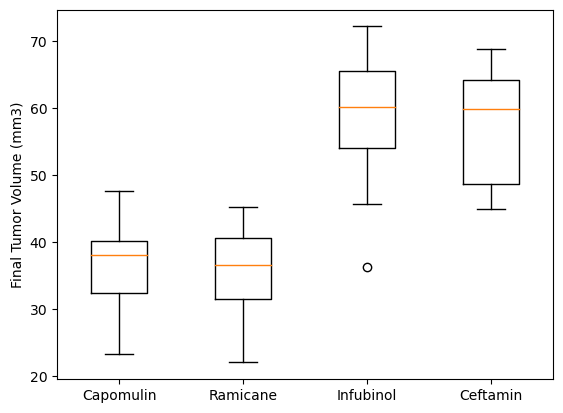

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels=treatments_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

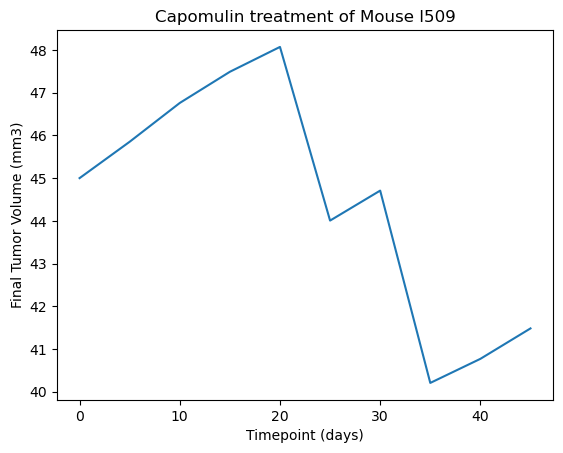

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = clean_df.loc[clean_df["Mouse ID"] == 'l509',:]
x_axis = capomulin_mouse_df["Timepoint"]
y_axis = capomulin_mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

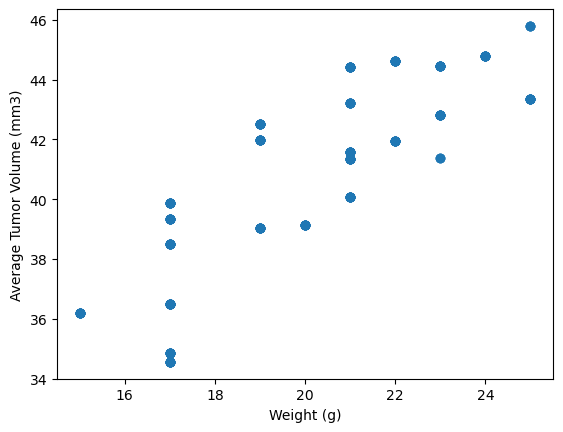

In [181]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 

# Filter data for Capomulin drug
data_capomulin = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
#Find Tumor Volume Avg for each mouse under Capomulin drug Treatment
avg_tumor_capomulin = data_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_capomulin_df = avg_tumor_capomulin.reset_index(name = "Average Tumor Volume(mm3)")
#Merge both dataframes to have avg tumor and weight on the same Table
weight_vol_capomulin = pd.merge(avg_tumor_capomulin_df, data_capomulin, on="Mouse ID", how='left')

#Plot the graph
plt.scatter(weight_vol_capomulin["Weight (g)"], weight_vol_capomulin["Average Tumor Volume(mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.83.


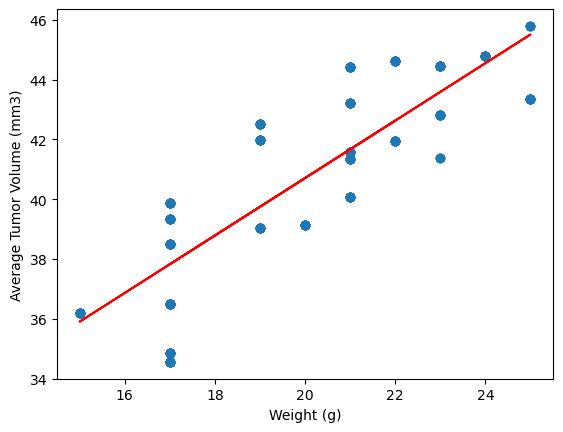

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation
correlation = st.pearsonr(weight_vol_capomulin["Weight (g)"], weight_vol_capomulin["Average Tumor Volume(mm3)"])
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

#Linear Regression Model
x_values = weight_vol_capomulin["Weight (g)"]
y_values = weight_vol_capomulin["Average Tumor Volume(mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()